### PERIN Eliott, WROBEL Nicolas, COLLOT Damien

# TP de Graphe :
# 1.1 Construction du graphe

In [1]:
import matplotlib.pyplot as plt
import math

class Graphe:
    def __init__(self):
        self.nomFichier = None
        self.sommets = {}
        self.types = {}
        self.aretes = []
        self.debut = None
        self.fin = None

    def ajouter_sommet(self, sommet, pos, type_sommet):
        self.sommets[sommet] = pos
        self.types[sommet] = type_sommet
        if type_sommet == 2:
            self.definir_debut(sommet)
        elif type_sommet == 3:
            self.definir_fin(sommet)

    def definir_debut(self, sommet):
        if self.debut is not None:
            raise ValueError("Un point de départ est déjà défini.")
        self.debut = sommet
        print("Sommet de départ défini:", sommet)

    def definir_fin(self, sommet):
        if self.fin is not None:
            raise ValueError("Un point d'arrivée est déjà défini.")
        self.fin = sommet
        print("Sommet d'arrivée défini:", sommet)

    def ajouter_arete(self, sommet1, sommet2, poids=None):
        if poids is None:
            if self.est_adjacent(sommet1, sommet2):
                poids = self.calculer_poids(sommet1, sommet2)
            else:
                print("Les sommets ne sont pas adjacents et ne peuvent pas être connectés sans poids spécifié.")
                return
        deja_present = False
        for s1, s2, p in self.aretes:
            if (s1 == sommet1 and s2 == sommet2) or (s1 == sommet2 and s2 == sommet1):
                deja_present = True
                break

        if not deja_present:
            self.aretes.append((sommet1, sommet2, poids))
            print("Arête ajoutée:", sommet1, "->", sommet2, ", Coût =", poids)
        else:
            print("Arête déjà existante et non ajoutée.")


    def est_adjacent(self, sommet1, sommet2):
        i1, j1 = sommet1
        i2, j2 = sommet2
        return abs(i1 - i2) <= 1 and abs(j1 - j2) <= 1

    def calculer_poids(self, sommet1, sommet2):
        i1, j1 = sommet1
        i2, j2 = sommet2
        di = abs(i1 - i2)
        dj = abs(j1 - j2)

        if di == 1 and dj == 1:
            return math.sqrt(2)
        else:
            return 1

    def supprimer_sommet(self, sommet):
        if sommet in self.sommets:
            del self.sommets[sommet]
            del self.types[sommet]
            if sommet == self.debut:
                self.debut = None
            elif sommet == self.fin:
                self.fin = None

            aretes_nouvelles = []
            for s1, s2, poids in self.aretes:
                if s1 != sommet and s2 != sommet:
                    aretes_nouvelles.append((s1, s2, poids))
            self.aretes = aretes_nouvelles
            print("Sommet", sommet, "et toutes les arêtes associées ont été supprimés.")
        else:
            print("Sommet non trouvé.")

    def supprimer_arete(self, sommet1, sommet2):
        aretes_nouvelles = []
        trouve = False
        for s1, s2, poids in self.aretes:
            if not ((s1 == sommet1 and s2 == sommet2) or (s1 == sommet2 and s2 == sommet1)):
                aretes_nouvelles.append((s1, s2, poids))
            else:
                trouve = True
        self.aretes = aretes_nouvelles
        if trouve:
            print("Arête entre", sommet1, "et", sommet2, "supprimée.")
        else:
            print("Arête non trouvée ou déjà supprimée.")
    
    def distance_euclidienne(self, a, b):
        return math.sqrt((self.sommets[a][0] - self.sommets[b][0]) ** 2 + (self.sommets[a][1] - self.sommets[b][1]) ** 2)

    def voisins(self, sommet):
        voisins_list = []
        for s1, s2, _ in self.aretes:
            if s1 == sommet:
                voisins_list.append(s2)
            elif s2 == sommet:
                voisins_list.append(s1)
        return voisins_list

    def tracer_graphe(self):
        plt.figure(figsize=(10, 8))
        for sommet1, sommet2, poids in self.aretes:
            if self.types[sommet1] != 0 and self.types[sommet2] != 0:
                plt.plot([self.sommets[sommet1][1], self.sommets[sommet2][1]],
                         [self.sommets[sommet1][0], self.sommets[sommet2][0]], 'bo-', linewidth=1, markersize=5)

        for sommet, pos in self.sommets.items():
            if sommet == self.debut:
                plt.plot(pos[1], pos[0], 'go', label='Départ', markersize=10)
            elif sommet == self.fin:
                plt.plot(pos[1], pos[0], 'ro', label='Arrivée', markersize=10)
            elif self.types[sommet] == 0:
                plt.plot(pos[1], pos[0], 'ko', markersize=5, color='grey', alpha=0.5)
            else:
                plt.plot(pos[1], pos[0], 'ko', markersize=5)

        plt.gca().invert_yaxis()
        plt.xlabel('Coordonnée X')
        plt.ylabel('Coordonnée Y')
        plt.title('Visualisation du Graphe')
        plt.legend()
        plt.grid(True)
        plt.show()

In [2]:
def creer_graphe_fichier(nom_fichier):
    graphe = Graphe()
    graphe.nomFichier = nom_fichier
    with open(nom_fichier, 'r') as fichier:
        n, m = map(int, fichier.readline().split())
        grille = [list(map(int, fichier.readline().split())) for _ in range(n)]
        
        for i in range(n):
            for j in range(m):
                valeur = grille[i][j]
                graphe.ajouter_sommet((i, j), (i, j), valeur)
                
                if valeur in [1, 2, 3]:
                    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
                    for di, dj in directions:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < n and 0 <= nj < m:
                            graphe.ajouter_arete((i, j), (ni, nj))
    return graphe


Arête ajoutée: (0, 0) -> (1, 0) , Coût = 1
Arête ajoutée: (0, 0) -> (0, 1) , Coût = 1
Arête ajoutée: (0, 0) -> (1, 1) , Coût = 1.4142135623730951
Sommet de départ défini: (0, 1)
Arête ajoutée: (0, 1) -> (1, 1) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 1) -> (0, 2) , Coût = 1
Arête ajoutée: (0, 1) -> (1, 0) , Coût = 1.4142135623730951
Arête ajoutée: (0, 1) -> (1, 2) , Coût = 1.4142135623730951
Arête ajoutée: (0, 2) -> (1, 2) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 2) -> (0, 3) , Coût = 1
Arête ajoutée: (0, 2) -> (1, 1) , Coût = 1.4142135623730951
Arête ajoutée: (0, 2) -> (1, 3) , Coût = 1.4142135623730951
Arête ajoutée: (0, 3) -> (1, 3) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 3) -> (0, 4) , Coût = 1
Arête ajoutée: (0, 3) -> (1, 2) , Coût = 1.4142135623730951
Arête ajoutée: (0, 3) -> (1, 4) , Coût = 1.4142135623730951
Arête ajoutée: (0, 4) -> (1, 4) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée

C:\Users\pyrof\AppData\Local\Temp\ipykernel_22524\2580010081.py:126: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(pos[1], pos[0], 'ko', markersize=5, color='grey', alpha=0.5)


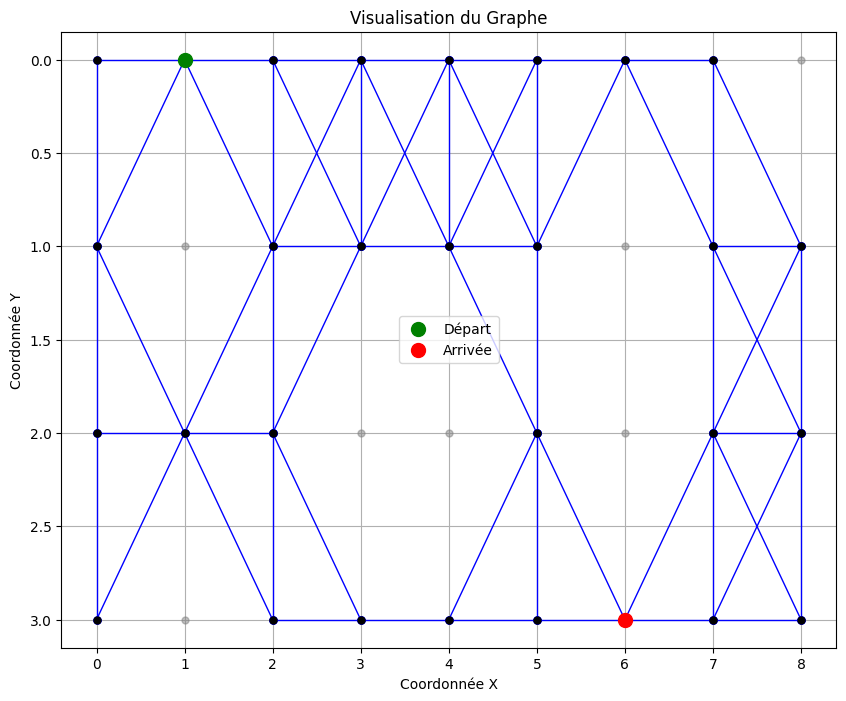

In [3]:
filename = "exo1.txt"
graphe = creer_graphe_fichier(filename)
print(graphe)
graphe.tracer_graphe()

Arête ajoutée: (0, 9) -> (1, 8) , Coût = 1.4142135623730951
Arête déjà existante et non ajoutée.
Arête déjà existante et non ajoutée.
Arête déjà existante et non ajoutée.
Les sommets ne sont pas adjacents et ne peuvent pas être connectés sans poids spécifié.


C:\Users\pyrof\AppData\Local\Temp\ipykernel_22524\2580010081.py:126: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(pos[1], pos[0], 'ko', markersize=5, color='grey', alpha=0.5)


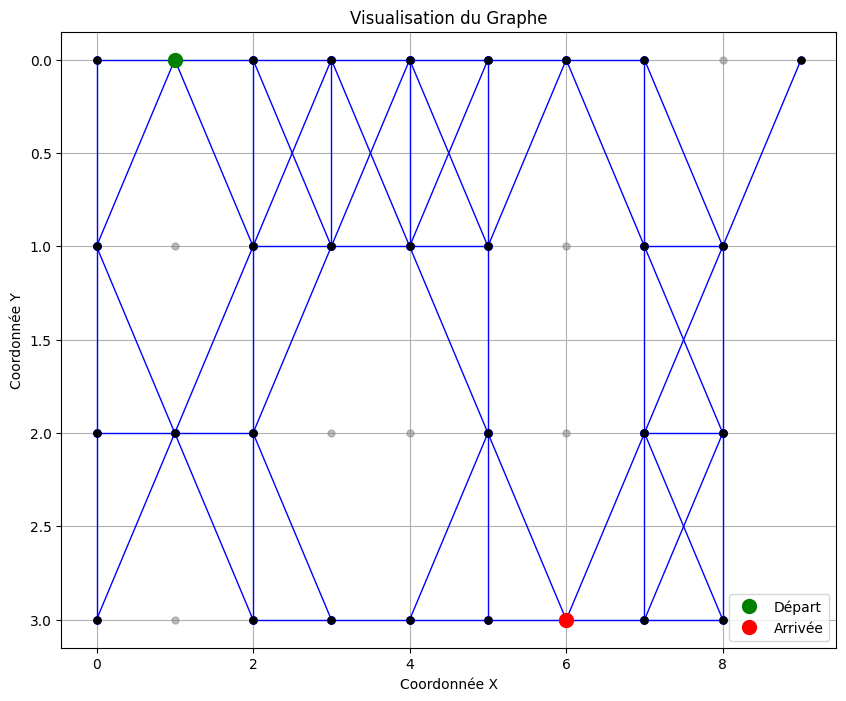

In [4]:
graphe.ajouter_sommet((0,9),(0,9),1)
graphe.ajouter_arete((0, 9), (1, 8)) 
graphe.ajouter_arete((0, 9), (1, 8))
graphe.ajouter_arete((1, 8), (0, 9))  
graphe.ajouter_arete((0, 1), (1, 1)) 
graphe.ajouter_arete((1,5),(1,0))

graphe.tracer_graphe()


Arête entre (1, 8) et (0, 9) supprimée.


C:\Users\pyrof\AppData\Local\Temp\ipykernel_22524\2580010081.py:126: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(pos[1], pos[0], 'ko', markersize=5, color='grey', alpha=0.5)


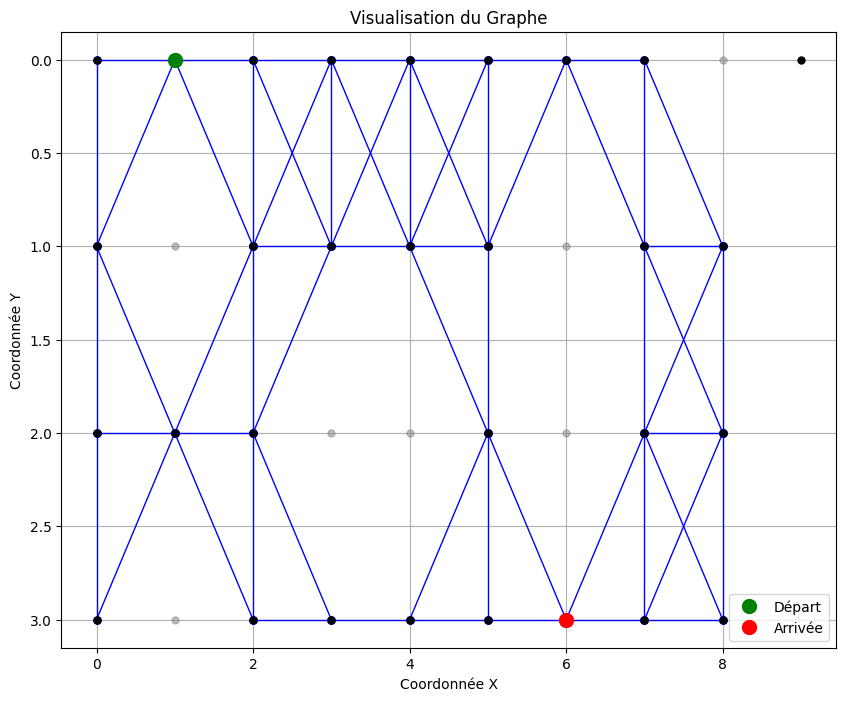

In [5]:
graphe.supprimer_arete((1,8),(0,9))
graphe.tracer_graphe()

Sommet (0, 9) et toutes les arêtes associées ont été supprimés.


C:\Users\pyrof\AppData\Local\Temp\ipykernel_22524\2580010081.py:126: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(pos[1], pos[0], 'ko', markersize=5, color='grey', alpha=0.5)


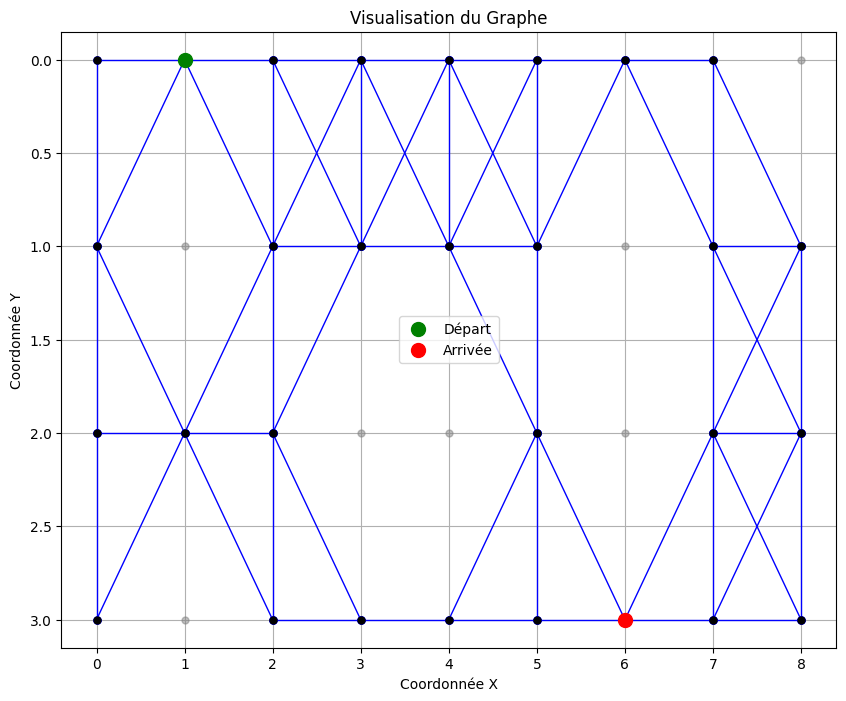

In [6]:
graphe.supprimer_sommet((0,9))
graphe.tracer_graphe()

# 1.2 Modélisation mathématique

## Modélisation du Problème en Programmation Linéaire

Le problème du plus court chemin dans un graphe peut être formulé comme un problème de programmation linéaire. Ce problème consiste à trouver le chemin le moins coûteux entre une source et une destination dans un graphe.

### Variables
Pour chaque arête $(u, v)$ dans le graphe, nous définissons une variable binaire $x_{uv}$ qui indique si l'arête $(u, v)$ est utilisée dans le chemin le plus court.

### Fonction Objectif
La fonction objectif est de minimiser le coût total du chemin. Cela est exprimé comme suit :

$$ \min \sum_{(u, v) \in E} c_{uv} x_{uv} $$

où $c_{uv}$ représente le coût de l'arête $(u, v)$.

### Contraintes

#### Conservation du Flux
Pour chaque sommet $v$ autre que la source $s$ et la destination $t$, la conservation du flux doit être respectée :

$$ \sum_{(u, v) \in E} x_{uv} - \sum_{(v, w) \in E} x_{vw} = 0 $$

#### Contraintes de la Source et de la Destination
La source $s$ doit avoir exactement une arête sortante active et la destination $t$ doit avoir exactement une arête entrante active :

- Pour la source $s$ :
$$ \sum_{(s, v) \in E} x_{sv} = 1 $$

- Pour la destination $t$ :
$$ \sum_{(u, t) \in E} x_{ut} = 1 $$

## Résumé
Cette modélisation permet de transformer le problème du plus court chemin en un problème de programmation linéaire, où la solution optimale indique le chemin le plus court en termes de coût entre deux points donnés dans un réseau.


## Implémentation avec CPLEX

In [7]:
import cplex
from cplex.exceptions import CplexError

def preparer_probleme(graphe, debut, fin):
    prob = cplex.Cplex()
    prob.set_problem_type(cplex.Cplex.problem_type.LP)
    
    prob.objective.set_sense(prob.objective.sense.minimize)

    variables_aretes = []
    couts = []
    for (sommet1, sommet2, poids) in graphe.aretes: 
        nom_variable = "x_" + str(sommet1) + "_" + str(sommet2)
        variables_aretes.append(nom_variable)
        couts.append(poids)
        prob.variables.add(obj=[poids], lb=[0], ub=[1], types=["B"], names=[nom_variable])

    for sommet in graphe.sommets: 
        aretes_sortantes = []
        aretes_entrantes = []
        for sommet1, sommet2, poids in graphe.aretes:
            if sommet1 == sommet:
                aretes_sortantes.append("x_" + str(sommet) + "_" + str(sommet2))
            if sommet2 == sommet:
                aretes_entrantes.append("x_" + str(sommet1) + "_" + str(sommet))
        
        if sommet == debut:
            prob.linear_constraints.add(
                lin_expr=[cplex.SparsePair(ind=aretes_sortantes, val=[1]*len(aretes_sortantes))],
                senses=["E"], rhs=[1]
            )
            prob.linear_constraints.add(
                lin_expr=[cplex.SparsePair(ind=aretes_entrantes, val=[1]*len(aretes_entrantes))],
                senses=["E"], rhs=[0]
            )
        elif sommet == fin:
            prob.linear_constraints.add(
                lin_expr=[cplex.SparsePair(ind=aretes_entrantes, val=[1]*len(aretes_entrantes))],
                senses=["E"], rhs=[1]
            )
            prob.linear_constraints.add(
                lin_expr=[cplex.SparsePair(ind=aretes_sortantes, val=[1]*len(aretes_sortantes))],
                senses=["E"], rhs=[0]
            )
        else:
            prob.linear_constraints.add(
                lin_expr=[cplex.SparsePair(ind=aretes_sortantes + aretes_entrantes, val=[1]*len(aretes_sortantes) + [-1]*len(aretes_entrantes))],
                senses=["E"], rhs=[0]
            )
    
    return prob


def resoudre_probleme(prob):
    resultat = {
        'etat': None,
        'valeur': None,
        'aretes_selectionnees': []
    }
    try:
        prob.solve()
        etat_solution = "État de la solution = {} : {}".format(prob.solution.get_status(), prob.solution.status[prob.solution.get_status()])
        valeur_solution = "Valeur de la solution = {}".format(prob.solution.get_objective_value())
        
        resultat['etat'] = etat_solution
        resultat['valeur'] = valeur_solution

        x = prob.solution.get_values()
        noms_aretes = prob.variables.get_names()
        aretes_selectionnees = []
        for i in range(len(x)):
            if x[i] > 0.5:
                aretes_selectionnees.append(noms_aretes[i])
        resultat['aretes_selectionnees'] = aretes_selectionnees
    except CplexError as exc:
        print(exc)
    
    return resultat




def sauvegarder_solution(graphe, resultat):
    if graphe.nomFichier:
        nom_fichier_sortie = "sol_" + graphe.nomFichier
        if resultat['aretes_selectionnees']:
            with open(nom_fichier_sortie, 'w') as fichier:
                fichier.write(resultat['etat'] + "\n")
                fichier.write(resultat['valeur'] + "\n")
                fichier.write("\nPlus court chemin :\n")
                for arete in resultat['aretes_selectionnees']:
                    fichier.write(arete + "\n")
            print("La solution a été sauvegardée dans:", nom_fichier_sortie)
        else:
            print("Aucune arête sélectionnée à sauvegarder.")
    else:
        print("Nom de fichier d'entrée non défini dans l'objet graphe.")



In [8]:
prob = preparer_probleme(graphe, graphe.debut, graphe.fin)
resoudre_probleme(prob)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Tried aggregator 4 times.
MIP Presolve eliminated 16 rows and 83 columns.
Aggregator did 22 substitutions.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.16 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.17 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.17 ticks)


{'etat': 'État de la solution = 101 : MIP_optimal',
 'valeur': 'Valeur de la solution = 6.242640687119285',
 'aretes_selectionnees': ['x_(0, 1)_(0, 2)',
  'x_(0, 2)_(0, 3)',
  'x_(0, 3)_(1, 4)',
  'x_(1, 4)_(2, 5)',
  'x_(2, 5)_(3, 6)']}

In [9]:
prob = preparer_probleme(graphe, graphe.debut, graphe.fin)
aretes_selectionnees = resoudre_probleme(prob)
sauvegarder_solution(graphe, aretes_selectionnees)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Tried aggregator 4 times.
MIP Presolve eliminated 16 rows and 83 columns.
Aggregator did 22 substitutions.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.16 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.17 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.17 ticks)
La solution a été sauvegardée dans: sol_exo1.txt


# 1.3 Algorithme de cheminement

In [10]:
def algoA(graphe, debut, fin):
    depart = [debut]
    precedent = {}
    g_scores = {}
    f_scores = {}

    for sommet in graphe.sommets:
        g_scores[sommet] = float("inf")
        f_scores[sommet] = float("inf")

    g_scores[debut] = 0
    f_scores[debut] = graphe.distance_euclidienne(debut, fin)

    while depart:
        courant = trouver_min_f_score(depart, f_scores)
        if courant == fin:
            chemin, cout_total = reconstruire_chemin(precedent, courant, g_scores)
            print("Chemin trouvé de {} à {}: {}".format(debut, fin, " -> ".join(map(str, chemin))))
            print("Coût total du chemin: {}".format(cout_total))
            return chemin, cout_total

        depart.remove(courant)
        for voisin in graphe.voisins(courant):
            tentative_g_score = g_scores[courant] + graphe.calculer_poids(courant, voisin)
            if tentative_g_score < g_scores[voisin]:
                precedent[voisin] = courant
                g_scores[voisin] = tentative_g_score
                f_scores[voisin] = tentative_g_score + graphe.distance_euclidienne(voisin, fin)
                if voisin not in depart:
                    depart.append(voisin)

    print("Aucun chemin trouvé de {} à {}.".format(debut, fin))
    return None, None


def trouver_min_f_score(depart, f_scores):
    min_sommet = None
    min_score = float('inf')
    for sommet in depart:
        if f_scores[sommet] < min_score:
            min_score = f_scores[sommet]
            min_sommet = sommet
    return min_sommet


def reconstruire_chemin(precedent, courant, g_scores):
    chemin_total = [courant]
    cout_total = g_scores[courant]
    while courant in precedent:
        courant = precedent[courant]
        chemin_total.insert(0, courant)
    return chemin_total, cout_total


def sauvegarde_solution_algoA(graphe, debut, fin):
    chemin, cout_total = algoA(graphe, debut, fin)
    if chemin:
        if graphe.nomFichier:
            nom_fichier = "solalgoA_" + graphe.nomFichier
            with open(nom_fichier, 'w') as fichier:
                fichier.write("Chemin trouvé de {} à {}:\n".format(debut, fin))
                fichier.write("Coût total du chemin: {}\n".format(cout_total))
                for sommet in chemin:
                    fichier.write(str(sommet) + "\n")
            print("Solution sauvegardée dans:", nom_fichier)
        else:
            print("Nom de fichier d'entrée non défini dans l'objet graphe.")
    else:
        print("Aucun chemin trouvé de {} à {}.".format(debut, fin))


In [11]:
chemin = algoA(graphe, graphe.debut, graphe.fin)
sauvegarde_solution_algoA(graphe, graphe.debut, graphe.fin)


Chemin trouvé de (0, 1) à (3, 6): (0, 1) -> (1, 2) -> (1, 3) -> (2, 4) -> (2, 5) -> (3, 6)
Coût total du chemin: 6.242640687119285
Chemin trouvé de (0, 1) à (3, 6): (0, 1) -> (1, 2) -> (1, 3) -> (2, 4) -> (2, 5) -> (3, 6)
Coût total du chemin: 6.242640687119285
Solution sauvegardée dans: solalgoA_exo1.txt


### Question 2

L'algorithme A* a été comparé en utilisant deux heuristiques : l'heuristique nulle (h(x) = 0) et la distance en ligne droite. L'heuristique de la distance en ligne droite a démontré une efficacité supérieure, réduisant le nombre de nœuds explorés et accélérant la recherche du chemin par rapport à l'heuristique nulle. Cette comparaison a confirmé que l'heuristique influençant la direction de recherche améliore significativement les performances de l'algorithme sur des réseaux bien configurés.

### Question 3

In [12]:
import time

graphe = creer_graphe_fichier("exo1.txt")

prob = preparer_probleme(graphe, graphe.debut, graphe.fin)
start_time_cplex = time.time()
resultat_cplex = resoudre_probleme(prob)
end_time_cplex = time.time()

elapsed_time_cplex = end_time_cplex - start_time_cplex
print(f"Temps d'exécution CPLEX: {elapsed_time_cplex:.3f} secondes")
print(resultat_cplex['etat'])
print(resultat_cplex['valeur'])

start_time_a_star = time.time()
chemin_a_star, cout_a_star = algoA(graphe, graphe.debut, graphe.fin)
end_time_a_star = time.time()


elapsed_time_a_star = end_time_a_star - start_time_a_star
print(f"Temps d'exécution de l'algorithme A*: {elapsed_time_a_star:.3f} secondes")
print(f"Chemin trouvé: {chemin_a_star}")
print(f"Coût total du chemin: {cout_a_star}")


Arête ajoutée: (0, 0) -> (1, 0) , Coût = 1
Arête ajoutée: (0, 0) -> (0, 1) , Coût = 1
Arête ajoutée: (0, 0) -> (1, 1) , Coût = 1.4142135623730951
Sommet de départ défini: (0, 1)
Arête ajoutée: (0, 1) -> (1, 1) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 1) -> (0, 2) , Coût = 1
Arête ajoutée: (0, 1) -> (1, 0) , Coût = 1.4142135623730951
Arête ajoutée: (0, 1) -> (1, 2) , Coût = 1.4142135623730951
Arête ajoutée: (0, 2) -> (1, 2) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 2) -> (0, 3) , Coût = 1
Arête ajoutée: (0, 2) -> (1, 1) , Coût = 1.4142135623730951
Arête ajoutée: (0, 2) -> (1, 3) , Coût = 1.4142135623730951
Arête ajoutée: (0, 3) -> (1, 3) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée: (0, 3) -> (0, 4) , Coût = 1
Arête ajoutée: (0, 3) -> (1, 2) , Coût = 1.4142135623730951
Arête ajoutée: (0, 3) -> (1, 4) , Coût = 1.4142135623730951
Arête ajoutée: (0, 4) -> (1, 4) , Coût = 1
Arête déjà existante et non ajoutée.
Arête ajoutée

 Les tests ont montré que les deux méthodes sont extrêmement rapides et efficaces pour ce problème spécifique, avec un temps d'exécution de 0.014 secondes pour CPLEX et un temps quasi nul pour l'algorithme A*. Les deux approches ont également produit des résultats identiques, trouvant un chemin optimal avec un coût de 6.242640687119285.

Cette comparaison démontre que chaque méthode a ses avantages, particulièrement en termes de vitesse et de précision pour des graphes de petite taille. CPLEX est très bon avec ses capacités de prétraitement qui réduisent efficacement la complexité du problème avant la résolution, tandis que l'algorithme A*, grâce à son heuristique bien adaptée, offre une très bonne rapidité. Le choix de la méthode peut donc dépendre de la complexité du réseau et des ressources disponibles. 

# Exercice 2

## Question 1 :

In [13]:
def position_circulaire(n, rayon=10):
    positions = {}
    for i in range(n):
        angle = 2 * math.pi * i / n
        x = rayon * math.cos(angle)
        y = rayon * math.sin(angle)
        positions[i] = (x, y)
    return positions

def creer_graphe_depuis_fichier_tsp(nom_fichier):
    graphe = Graphe()
    graphe.nomFichier = nom_fichier
    with open(nom_fichier, 'r') as fichier:
        n, m = map(int, fichier.readline().strip().split())
        positions = position_circulaire(n)
        for i in range(n):
            graphe.ajouter_sommet((i, i), positions[i], 1)
            print("position du sommet : ",(i,i)," en ",positions[i])
        for _ in range(m):
            line = fichier.readline().strip()
            if line:
                s1, s2, poids = map(int, line.split())
                sommet1 = (s1, s1)
                sommet2 = (s2, s2)
                graphe.ajouter_arete(sommet1, sommet2, poids)
    return graphe


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


position du sommet :  (0, 0)  en  (10.0, 0.0)
position du sommet :  (1, 1)  en  (3.0901699437494745, 9.510565162951535)
position du sommet :  (2, 2)  en  (-8.090169943749473, 5.877852522924733)
position du sommet :  (3, 3)  en  (-8.090169943749475, -5.87785252292473)
position du sommet :  (4, 4)  en  (3.0901699437494723, -9.510565162951536)
Arête ajoutée: (0, 0) -> (1, 1) , Coût = 2
Arête ajoutée: (0, 0) -> (2, 2) , Coût = 6
Arête ajoutée: (1, 1) -> (2, 2) , Coût = 3
Arête ajoutée: (1, 1) -> (3, 3) , Coût = 5
Arête ajoutée: (2, 2) -> (3, 3) , Coût = 1
Arête ajoutée: (2, 2) -> (4, 4) , Coût = 4
Arête ajoutée: (3, 3) -> (4, 4) , Coût = 5


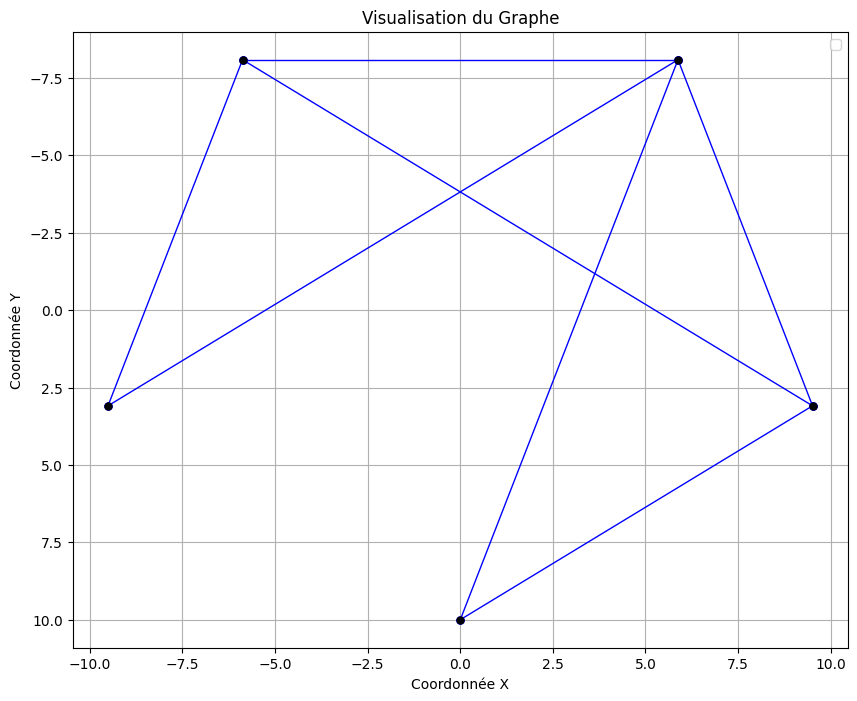

In [14]:
# Exemple d'utilisation de la fonction
grapheTSP = creer_graphe_depuis_fichier_tsp("test2.txt")
grapheTSP.tracer_graphe()

## Question 2 : Formulation du Problème du Voyageur de Commerce (TSP)

### Fonction Objectif
La fonction objectif du TSP vise à minimiser le coût total du chemin parcouru. Elle est formulée comme suit :
$$
\min \sum_{i=1}^{n} \sum_{j=1, j \neq i}^{n} c_{ij} x_{ij}
$$
où $c_{ij}$ représente le coût de l'arête entre les sommets $i$ et $j$, et $x_{ij}$ est une variable binaire qui vaut 1 si l'arête est utilisée dans le chemin, sinon 0.

### Contraintes

#### Contraintes de Degré
Chaque sommet doit être connecté exactement par deux arêtes, une entrante et une sortante. Ces contraintes s'assurent que chaque ville est visitée une seule fois :
$$
\sum_{j=1, j \neq i}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}
$$
$$
\sum_{i=1, i \neq j}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}
$$

#### Contraintes de Sous-Tour
Pour éviter les sous-tours, qui sont des cycles ne couvrant pas tous les sommets, on utilise des contraintes supplémentaires avec des variables d'ordre $u_i$ :
$$
u_i - u_j + nx_{ij} \leq n-1 \quad \forall i, j \in \{2, \dots, n\}, i \neq j
$$
Ces contraintes empêchent la formation de sous-tours en imposant un ordre de visite entre les sommets, où $n$ est le nombre total de sommets.

### Variables Additionnelles
- $u_i$: variables continues qui aident à prévenir les sous-tours en assignant un ordre aux sommets dans le chemin.


## Question 3 :

In [15]:
import cplex
from cplex.exceptions import CplexError

def preparer_probleme_tsp(graphe):
    prob = cplex.Cplex()
    prob.set_problem_type(cplex.Cplex.problem_type.LP)
    prob.objective.set_sense(prob.objective.sense.minimize)

    # Ajout des variables pour chaque arête
    variables_aretes = []
    couts = []
    for (sommet1, sommet2, poids) in graphe.aretes:
        nom_variable = f"x_{sommet1}_{sommet2}"
        variables_aretes.append(nom_variable)
        couts.append(poids)
        prob.variables.add(obj=[poids], lb=[0], ub=[1], types=["B"], names=[nom_variable])

   # Ajout des contraintes de degré
    for sommet in graphe.sommets:
        aretes_sortantes = [f"x_{sommet1}_{sommet2}" for sommet1, sommet2, poids in graphe.aretes if sommet1 == sommet]
        aretes_entrantes = [f"x_{sommet1}_{sommet2}" for sommet1, sommet2, poids in graphe.aretes if sommet2 == sommet]
        prob.linear_constraints.add(
            lin_expr=[cplex.SparsePair(ind=aretes_sortantes + aretes_entrantes, val=[1]*len(aretes_sortantes) + [1]*len(aretes_entrantes))],
            senses=["E"],
            rhs=[2]
        )

    # Ajout des contraintes pour éviter les sous-tours (Miller-Tucker-Zemlin)
    u = {sommet: f"u_{sommet}" for sommet in graphe.sommets}
    u_values = list(u.values())
    num_vertices = len(graphe.sommets)
    prob.variables.add(
        obj=[0] * num_vertices,  # Aucun coût associé aux variables u
        lb=[0] * num_vertices,
        ub=[num_vertices - 1] * num_vertices,
        types=["C"] * num_vertices,
        names=u_values
    )
    set_aretes = {(sommet1, sommet2) for sommet1, sommet2, _ in graphe.aretes}
    for sommet1 in graphe.sommets:
        for sommet2 in graphe.sommets:
            if sommet1 != sommet2 and (sommet1, sommet2) in set_aretes:
                prob.linear_constraints.add(
                    lin_expr=[cplex.SparsePair(ind=[f"x_{sommet1}_{sommet2}", u[sommet1], u[sommet2]], val=[num_vertices, 1, -1])],
                    senses=["L"],
                    rhs=[num_vertices - 1]
                )

    return prob

## Question 4 :

Arête ajoutée: 0 -> 4, Coût = 27
Arête ajoutée: 0 -> 5, Coût = 12
Arête ajoutée: 0 -> 6, Coût = 22
Arête ajoutée: 0 -> 9, Coût = 44
Arête ajoutée: 1 -> 5, Coût = 30
Arête ajoutée: 1 -> 7, Coût = 38
Arête ajoutée: 2 -> 6, Coût = 28
Arête ajoutée: 2 -> 8, Coût = 34
Arête ajoutée: 2 -> 9, Coût = 21
Arête ajoutée: 3 -> 4, Coût = 42
Arête ajoutée: 3 -> 5, Coût = 31
Arête ajoutée: 3 -> 6, Coût = 50
Arête ajoutée: 3 -> 8, Coût = 37
Arête ajoutée: 3 -> 9, Coût = 40
Arête ajoutée: 4 -> 6, Coût = 35
Arête ajoutée: 4 -> 9, Coût = 45
Arête ajoutée: 5 -> 7, Coût = 46
Arête ajoutée: 5 -> 9, Coût = 41
Arête ajoutée: 6 -> 9, Coût = 34
Arête ajoutée: 7 -> 9, Coût = 30
Arête ajoutée: 8 -> 9, Coût = 31
Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 322.000000 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 21 rows and 11 columns.
MIP Presolve modified 34 coefficients.
Aggregator did 2 substit

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


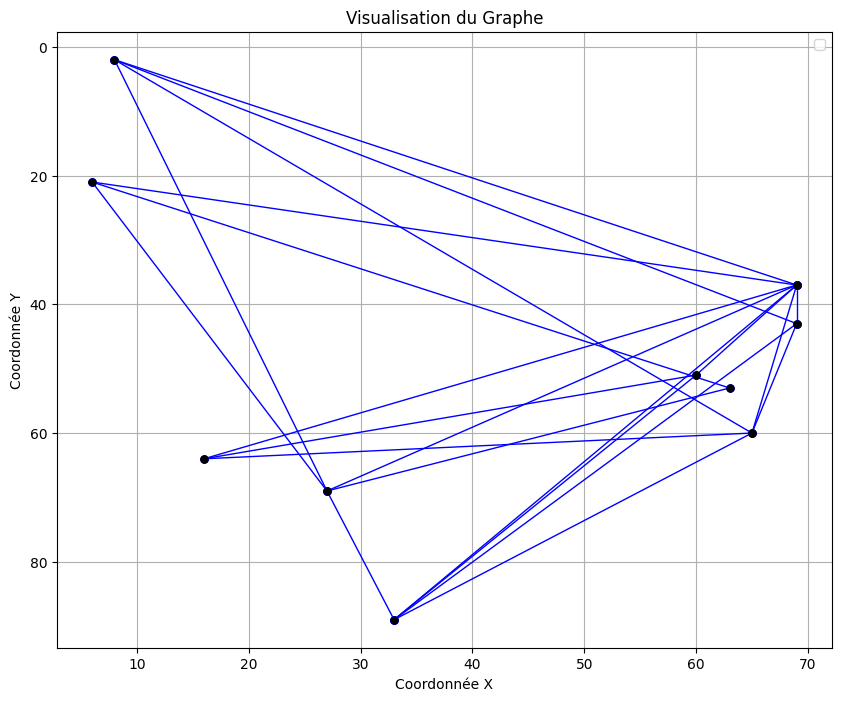

{'etat': 'État de la solution = 101 : MIP_optimal', 'valeur': 'Valeur de la solution = 301.0', 'aretes_selectionnees': ['x_0_5', 'x_0_6', 'x_1_5', 'x_1_7', 'x_2_8', 'x_2_9', 'x_3_4', 'x_3_8', 'x_4_6', 'x_7_9', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9']}


In [24]:
import random

def generate_random_graph(num_vertices, probability, cost_range=(10, 50)):
    edges = []
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < probability:
                cost = random.randint(*cost_range)
                edges.append((i, j, cost))
    return num_vertices, len(edges), edges

# Exemple de génération de graphe
num_vertices, num_edges, edges = generate_random_graph(10, 0.5)  # 10 sommets, probabilité de 0.5

# Créer une instance de Graphe et ajouter les sommets et arêtes
graphe = Graphe()
for i in range(num_vertices):
    graphe.ajouter_sommet(i, (random.randint(0, 100), random.randint(0, 100)), type_sommet=1)  # Type 1 pour tous les sommets

for v1, v2, cost in edges:
    graphe.ajouter_arete(v1, v2, cost)

# Préparer et résoudre le problème TSP
prob = preparer_probleme_tsp(graphe)
resultat = resoudre_probleme(prob)

# Visualiser le graphe et la solution
graphe.tracer_graphe()
print(resultat)


L'instance du problème du voyageur de commerce résolue avec CPLEX a abouti à une solution optimale d'un coût total de 301, démontrant une efficacité notable dans l'application des méthodes de programmation linéaire entière pour ce type de problématique. Le processus de résolution a impliqué des techniques de presolve, telles que l'agrégation et la détection de symétries, qui ont réduit la complexité du modèle initial, permettant ainsi à CPLEX de trouver rapidement la solution optimale. En particulier, la réduction du problème a permis de simplifier les calculs, et les contraintes de sous-tours ont été efficacement gérées pour garantir que chaque sommet soit visité une seule fois sans créer de cycles indésirables.

La visualisation du graphe montre un réseau dense de connexions, où chaque arête représente une option de parcours potentiel avec un coût associé. L'algorithme a efficacement évalué ces coûts pour déterminer le chemin le moins onéreux, aboutissant à un coût total de 301, confirmé par l'absence de gap indiquant que la solution trouvée est optimale. Cette performance souligne la capacité du solveur CPLEX à traiter des problèmes combinatoires complexes en un temps remarquablement court, illustrant ainsi l'adaptabilité et la puissance des méthodes modernes d'optimisation pour résoudre des problèmes de grande envergure dans divers contextes pratiques.